In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score



# Fetching Dataset

In [171]:
df= pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [173]:
df.shape

(768, 9)

# Checking Is the null values present in the dataset

In [174]:
df.sum().isna()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

# Checking Data Statistics

In [175]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


While checking the dataset we have found some outliest in dataset and also I have check in 'insulin' colum STD is bigger then MEAN so that we have to check the distribution of data and also check for the outliers. I also observed that in some columns ther are min value is 0 which is not possible (Glucose,BloodPressure,SkinThickness,Insulin,BMI)

# I am replacing those Zero values with mean 

In [176]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

# Now we are checking the stats again

In [177]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Now its looking little better but we have to check the distribution and outlies as well

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

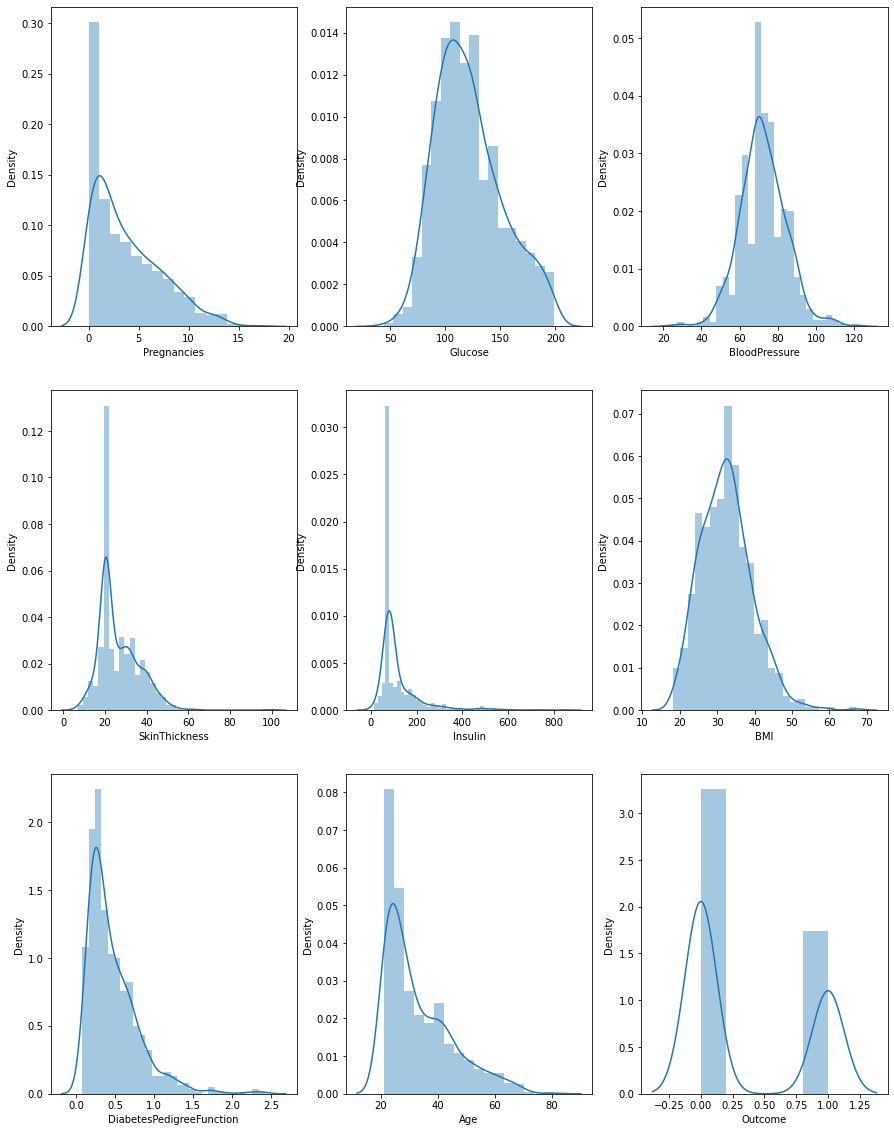

In [178]:
plt.figure(figsize = (15,20))
plotnumber =1
for column in df:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()    

As I check Distibution is not looking good excet (Glucose) in all the columns data so we have to check for outlies

# Now we are ploting boxplot for outliers detection

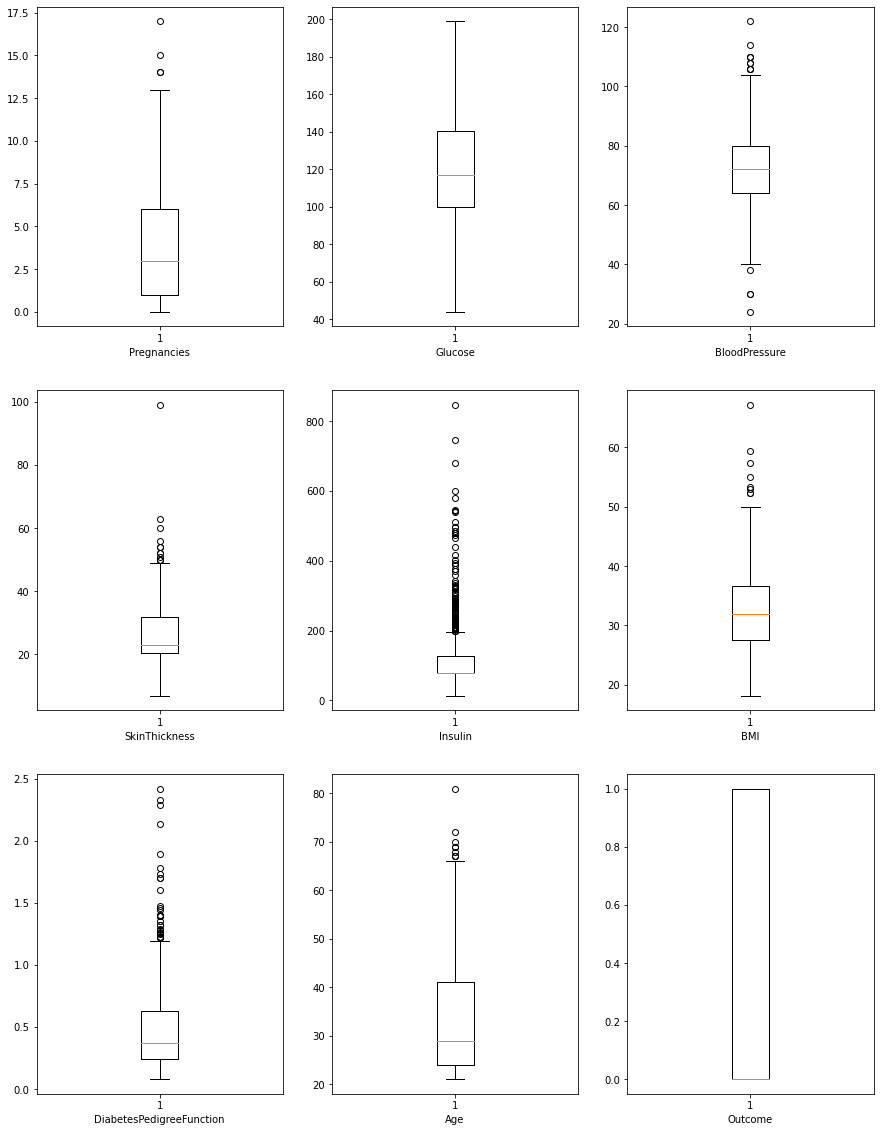

In [179]:
plt.figure(figsize = (15,20))
plotnumber =1
for column in df:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show() 

We have outlies in (Pregnancies, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age )

# We are going to remove them using quantile meathod

In [180]:
q1 = df.quantile(0.25)

q3 = df.quantile(0.75)

iqr = q3 - q1
iqr

Pregnancies                  5.000000
Glucose                     40.500000
BloodPressure               16.000000
SkinThickness               11.463542
Insulin                     47.450521
BMI                          9.100000
DiabetesPedigreeFunction     0.382500
Age                         17.000000
Outcome                      1.000000
dtype: float64

In [181]:
high_preg = (q3.Pregnancies +(1.5*iqr.Pregnancies))
print(high_preg)
index = np.where(df['Pregnancies'] > high_preg)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()


13.5
(764, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [182]:
high_bp = (q3.BloodPressure +(1.5*iqr.BloodPressure))
print(high_bp)
index = np.where(df['BloodPressure'] > high_bp)
print(index)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

104.0
(array([ 43,  84, 105, 175, 359, 545, 654, 658, 668, 687], dtype=int64),)
(754, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
749,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
750,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
751,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
752,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [183]:
high_SkinThickness = (q3.SkinThickness +(1.5*iqr.SkinThickness))
print(high_SkinThickness)
index = np.where(df['SkinThickness'] > high_SkinThickness)
print(index)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

49.1953125
(array([ 56,  84,  96, 116, 146, 205, 267, 269, 437, 523, 569, 581],
      dtype=int64),)
(742, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
737,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
738,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
739,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
740,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [184]:
high_Insulin = (q3.Insulin +(1.5*iqr.Insulin))
print(high_Insulin)
index = np.where(df['Insulin'] > high_Insulin)
print(index)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

198.42578125
(array([  8,  13,  16,  20,  31,  39,  52,  53,  55,  71,  90, 104, 124,
       131, 136, 144, 152, 175, 184, 188, 195, 203, 208, 216, 219, 235,
       236, 242, 246, 265, 272, 273, 282, 283, 294, 305, 320, 344, 345,
       348, 354, 359, 372, 376, 379, 393, 396, 399, 408, 409, 435, 440,
       462, 467, 468, 469, 493, 501, 519, 521, 526, 527, 535, 541, 554,
       563, 572, 584, 586, 590, 623, 633, 635, 648, 654, 660, 669, 674,
       681, 684, 687, 689, 695, 722, 727], dtype=int64),)
(657, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
652,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
653,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
654,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
655,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [185]:
high_BMI = (q3.BMI +(1.5*iqr.BMI))
print(high_BMI)
index = np.where(df['BMI'] > high_BMI)
print(index)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

50.25
(array([105, 164, 254], dtype=int64),)
(654, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
649,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
650,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
651,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
652,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [186]:
high_DiabetesPedigreeFunction = (q3.DiabetesPedigreeFunction +(1.5*iqr.DiabetesPedigreeFunction))
print(high_DiabetesPedigreeFunction)
index = np.where(df['DiabetesPedigreeFunction'] > high_DiabetesPedigreeFunction)
print(index)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

1.2
(array([  4,  11,  38,  47,  83, 123, 157, 182, 204, 206, 216, 244, 256,
       276, 311, 322, 454, 502, 523, 526, 527, 560, 562], dtype=int64),)
(631, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
626,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
627,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
628,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
629,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [187]:
high_Age = (q3.Age +(1.5*iqr.Age))
print(high_Age)
index = np.where(df['Age'] > high_Age)
print(index)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

66.5
(array([ 98, 291, 366, 370, 396, 440, 543, 549, 558], dtype=int64),)
(622, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
617,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
618,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
619,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
620,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [190]:
low_bp = (q1.BloodPressure -(1.5*iqr.BloodPressure))
print(low_bp)
index = np.where(df['BloodPressure'] < low_bp)
print(index)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

40.0
(array([], dtype=int64),)
(619, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
614,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
615,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
616,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
617,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


# Once we have removed the outliers we need to check the distribution again

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

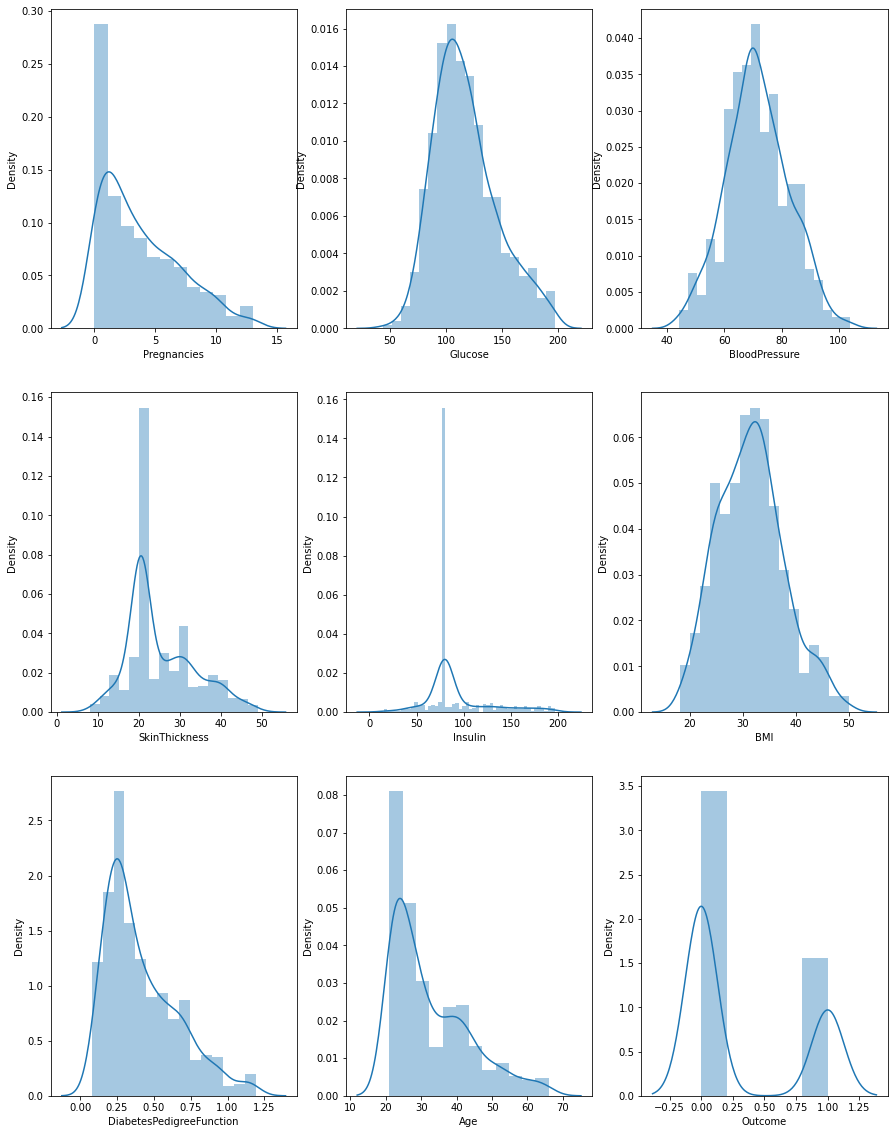

In [192]:
plt.figure(figsize = (15,20))
plotnumber =1
for column in df:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()  

Distribution is looking good now so we can go ahead with other visualization technics

# Now we are checking relationship between features Vs Label so for that we are using scatterplot

In [206]:
x = df.drop(columns = ['Outcome'])
y = df['Outcome']

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\l

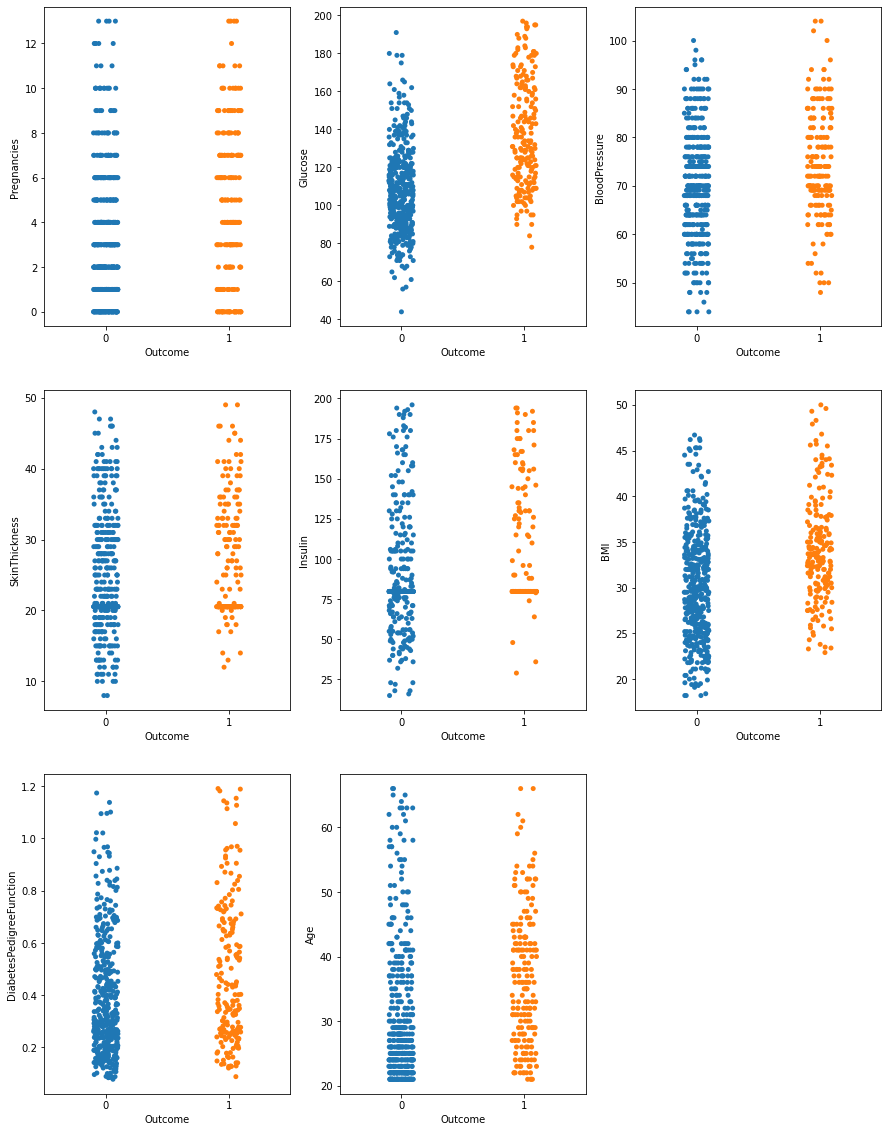

In [215]:
plt.figure(figsize = (15,20))
plotnumber =1
for column in x:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
        
    plotnumber+=1
plt.show() 

Relationship is looking good

# Now we have to check the relationship between features Vs features (Multicollinearity problem) and for that we have to scaled our data

In [219]:
scaled = StandardScaler()
x_scaled = scaled.fit_transform(x)

In [220]:
x_scaled.shape[1]

8

In [223]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled, i ) for i in range(x_scaled.shape[1])]
vif['features'] = x.columns
vif

,vif,features
0,1.448654,Pregnancies
1,1.250247,Glucose
2,1.258898,BloodPressure
3,1.411508,SkinThickness
4,1.200759,Insulin
5,1.447599,BMI
6,1.038530,DiabetesPedigreeFunction
7,1.659799,Age


All the VIF values are less then 5 so we can say that there is no multicollnearity probem with the dataset

# Ploting Heat Map

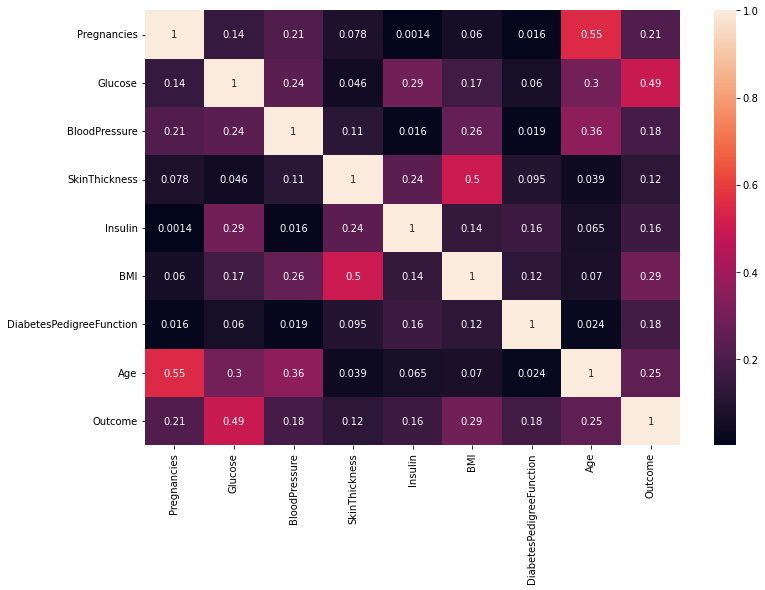

In [224]:
df_corr = df.corr().abs() #This code will get the coefficient of one variable vs all other variables 

plt.figure(figsize	=(12,8))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()


In [227]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state=345)

In [230]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [235]:
y_pred= lr.predict(x_test)

In [236]:
accuracy_score(y_test,y_pred)

0.7935483870967742

In [237]:
confusion_matrix(y_test,y_pred)

array([[94, 10],
       [22, 29]], dtype=int64)

In [238]:
from sklearn.metrics import classification_report

In [240]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       104
           1       0.74      0.57      0.64        51

    accuracy                           0.79       155
   macro avg       0.78      0.74      0.75       155
weighted avg       0.79      0.79      0.79       155



In [241]:
tpr,fpr,threshold = roc_curve(y_test,y_pred)

In [244]:
print('threshold =', threshold)
print('True Positive Rate =', tpr)
print('False Positive Rate =' , fpr)


threshold = [2 1 0]
True Positive Rate = [0.         0.09615385 1.        ]
False Positive Rate = [0.         0.56862745 1.        ]


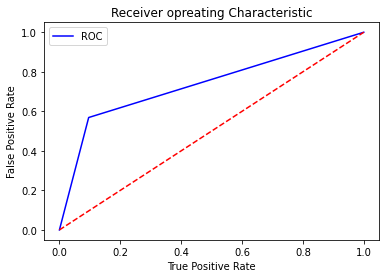

In [254]:
plt.plot(tpr,fpr,color = 'blue', label ='ROC')
plt.plot([0,1],[0,1],color = 'red', linestyle = '--')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('Receiver opreating Characteristic')
plt.legend()
plt.show()


In [258]:
auc_score = roc_auc_score(y_test,y_pred)
auc_score

0.736236802413273